Create a machine learning model that can predict the genre of a
movie based on its plot summary or other textual information. You
can use techniques like TF-IDF or word embeddings with classifiers

such as Naive Bayes, Logistic Regression, or Support Vector

Machines.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
des_df=pd.read_csv('/content/description.txt')

In [3]:
des_df

,Train data:
0,ID ::: TITLE ::: GENRE ::: DESCRIPTION
1,ID ::: TITLE ::: GENRE ::: DESCRIPTION
2,ID ::: TITLE ::: GENRE ::: DESCRIPTION
3,ID ::: TITLE ::: GENRE ::: DESCRIPTION
4,Test data:
5,ID ::: TITLE ::: DESCRIPTION
6,ID ::: TITLE ::: DESCRIPTION
7,ID ::: TITLE ::: DESCRIPTION
8,ID ::: TITLE ::: DESCRIPTION
9,Source:


In [4]:
train_data = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

/tmp/ipython-input-3277949839.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


In [5]:
train_data.sample(5)

,ID,TITLE,GENRE,DESCRIPTION
2933,2934,Great Women Writers: The Brontë Sisters (2000),documentary,Emily Bronte was born in England in 1818. Emi...
2508,2509,La hora de la siesta (2014),documentary,We sail through the seas of absence and remem...
275,276,Star Spangled Canadians (2000),documentary,Award-winning documentary filmmaker David Pap...
468,469,Aaron's Russian Boy Orgy (2001),adult,This orgy begins through translation by ident...
2696,2697,Vous etes ici (2016),documentary,"Every year, millions of people, from all arou..."


In [6]:
test_data = pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

/tmp/ipython-input-382853052.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


In [7]:
test_data.sample(5)

,ID,TITLE,GENRE,DESCRIPTION
212,213,Set It Up (2018),Two young assistants in New York City realize...,NaN
380,381,Codename: Madeleine (????),"Not enough Indian, not enough American, Madel...",NaN
3044,3045,The Road to Coronation Street (2010),In 1960 a former child actor with writing amb...,NaN
2634,2635,Dissocia (2019),After a decade of forgettable low budget B mo...,NaN
3054,3055,Thunderflop (2016),Zach and Viggo: Thunderflop is the debut show...,NaN


In [8]:
test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

/tmp/ipython-input-2475430290.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


In [9]:
test_solution_data.sample(5)

,ID,TITLE,GENRE,DESCRIPTION
1288,1289,A Broad Way (2007),documentary,The story of filmmakers as diverse as the str...
2491,2492,Franky (????/II),horror,Cassie Daniels is an up and coming cage fight...
2376,2377,And Punching the Clown (2016),comedy,Hapless satirical songwriter Henry Phillips i...
2365,2366,Prairie Rose (2006),drama,Prairie Rose is the fictional historical dram...
540,541,Rebellerna (2005),documentary,In 1968 formed a hundred people Maoist secret...


In [10]:
train_data.isnull().sum()

,0
ID,0
TITLE,0
GENRE,0
DESCRIPTION,0


In [11]:
test_data.isnull().sum()

,0
ID,0
TITLE,0
GENRE,0
DESCRIPTION,3260


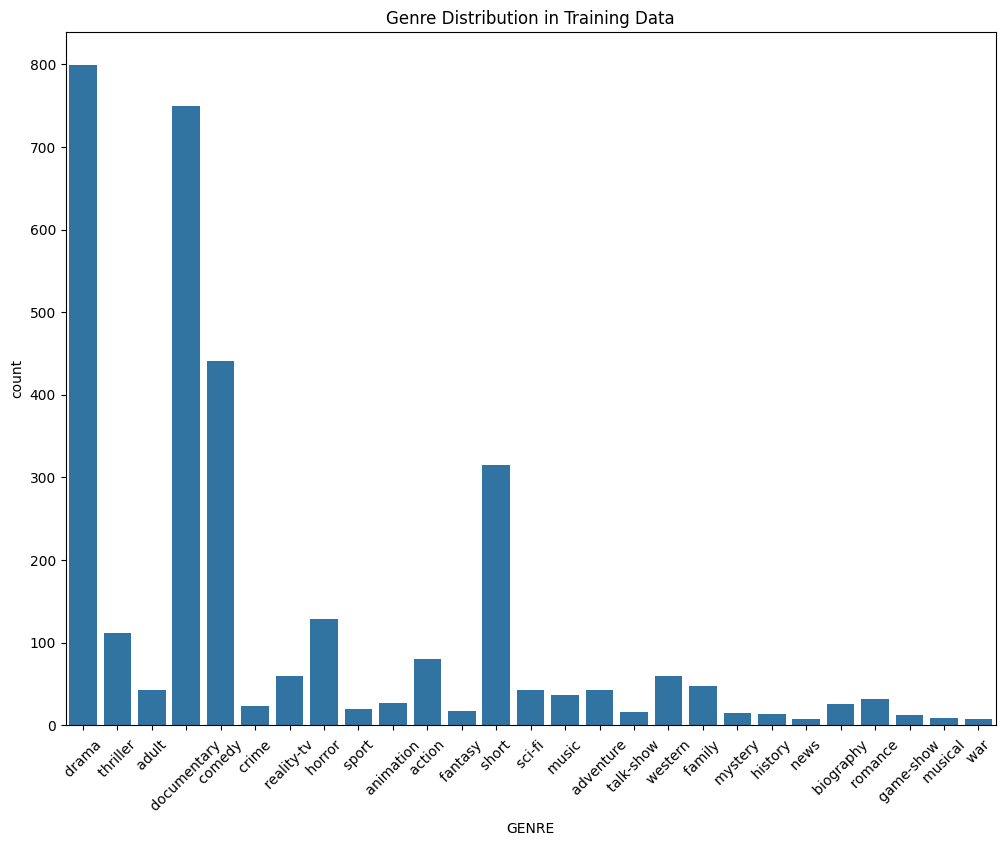

In [12]:
plt.figure(figsize=(12,9))
sns.countplot(data=train_data, x='GENRE')
plt.title("Genre Distribution in Training Data")
plt.xticks(rotation=45)
plt.show()

In [13]:
tfidf=TfidfVectorizer(stop_words='english')
X_train=tfidf.fit_transform(train_data['DESCRIPTION'])
X_test=tfidf.transform(test_solution_data['DESCRIPTION'].fillna(''))

In [14]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])

Naive bayes model

In [15]:
Naive_bayes=MultinomialNB()
Naive_bayes.fit(X_train,y_train)

MultinomialNB()

In [16]:
y_pred_naive=Naive_bayes.predict(X_test)
y_pred_naive

array([8, 8, 7, ..., 7, 8, 8])

Logistic Regression Model

In [ ]:
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred_logistic=logistic_regression.predict(X_test)
y_pred_logistic

array([8, 8, 7, ..., 7, 8, 8])

Support Vector Machine Model

In [ ]:
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred_svm=svm.predict(X_test)
y_pred_svm

array([8, 8, 7, ..., 7, 8, 8])

In [ ]:
def predict_movie(description):
    tfidf1 = tfidf.transform([description])
    pred_label = logistic_regression.predict(tfidf1)
    return label_encoder.inverse_transform(pred_label)[0]


sample_descr_for_movie = "A girls who reject the boy proposal and then that girl fall in love with that boy "
print(predict_movie(sample_descr_for_movie))

 drama 
